In [1]:
from model import taxiway_model, create_fault_scen_metrics

from fmdtools.sim import propagate as prop
import networkx as nx
from common import plot_tstep, plot_course

In [2]:
import pandas as pd

## Taxiway Model Overview

The taxiway model has three main agents:
- Helicopter, which lands and takes off from a helipad
- Aircraft, which lands at a runway, taxis to a gate, and takes off from a runway (and may be UAVs or Piloted Aircraft)
- ATC, which coordinates operations

These agents interact via the flows:
- Ground, a MultiFlow tracking the map as well as agent assignments/allocations
- Location, a MultiFlow tracking the position/velocity of each route on the map, and
- Requests, a CommsFlow tracking the messages sent between the ATC and the Aircraft/Helicopters

In [3]:
from fmdtools.define.architecture.function import FunctionArchitectureTypeGraph

In [4]:
mdl = taxiway_model()

In [5]:
tg = FunctionArchitectureTypeGraph(mdl)

In [6]:
tg.set_edge_labels(title='')

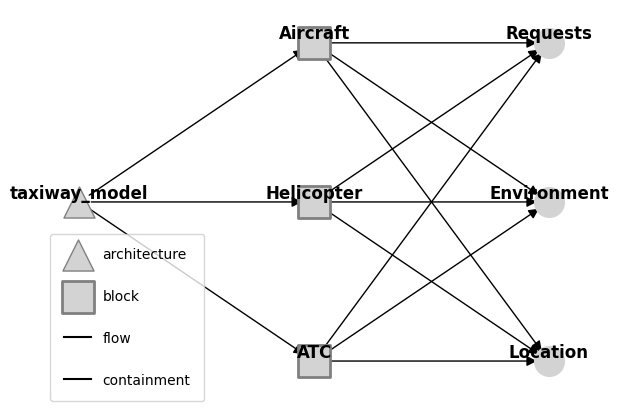

In [7]:
fig, ax = tg.draw(figsize=(7,5), withlegend=True, legend_bbox=(0, .2))

In [8]:
fig.savefig("modelstructure.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
mdl.flows['location']

location Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   ma1 Location flow: LocationState(x=10.0, y=20.0, xd=0.0, yd=0.0, speed=0.0, stage='takeoff', mode='standby')
   percieved Location flow: LocationState(x=10.0, y=20.0, xd=0.0, yd=0.0, speed=0.0, stage='takeoff', mode='standby')
   closest Location flow: LocationState(x=10.0, y=20.0, xd=0.0, yd=0.0, speed=0.0, stage='takeoff', mode='standby')
   ma2 Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   percieved Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   closest Location flow: LocationState(x=10.0, y=20.0, xd=0.0, yd=0.0, speed=0.0, stage='takeoff', mode='standby')
   ma3 Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, stage='flight', mode='standby')
   percieved Location flow: LocationState(x=30.0, y=25.0, xd=0.0, yd=0.0, speed=0.0, s

In [10]:
mdl.flows['requests']

requests Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
   atc: atc Requests flow: RequestState(atc_com='None', asset_req='land', route='           ')
       out: atc_out Requests flow: RequestState(atc_com='None', asset_req='None', route='           ')
       in: {'ma1': ('asset_req',), 'ma2': ('asset_req',), 'ma3': ('asset_req',), 'ua1': ('asset_req',), 'ua2': ('asset_req',), 'ua3': ('asset_req',), 'h1': ('asset_req',), 'h2': ('asset_req',)}
       received: {}
       h1: h1 Requests flow: RequestState(atc_com='None', asset_req='taxi', route='           ')
       h2: h2 Requests flow: RequestState(atc_com='None', asset_req='land', route='           ')
       ua1: ua1 Requests flow: RequestState(atc_com='None', asset_req='taxi', route='           ')
       ua2: ua2 Requests flow: RequestState(atc_com='None', asset_req='land', route='           ')
       ua3: ua3 Requests flow: RequestState(atc_com='None', asset_req='land', route='           ')
     

In [11]:
mdl.flows['ground']

ground Environment flow: TaxiwayStates(area_allocation={'takeoff1': {'ma1'}, 'landing1': set(), 'helipad1': {'h1'}, 'gate1': set(), 'gate2': set(), 'gate3': set(), 'gate4': set(), 'gate5': set(), 'gate6': {'ua1'}, 'air_loc': set()}, asset_area={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'gate6', 'ua2': 'air_loc', 'ua3': 'air_loc', 'ma1': 'takeoff1', 'ma2': 'air_loc', 'ma3': 'air_loc'}, asset_assignment={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'gate6', 'ua2': 'air_loc', 'ua3': 'air_loc', 'ma1': 'takeoff1', 'ma2': 'air_loc', 'ma3': 'air_loc'})
   atc Environment flow: TaxiwayStates(area_allocation={'takeoff1': {'ma1'}, 'landing1': set(), 'helipad1': {'h1'}, 'gate1': set(), 'gate2': set(), 'gate3': set(), 'gate4': set(), 'gate5': set(), 'gate6': {'ua1'}, 'air_loc': set()}, asset_area={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'gate6', 'ua2': 'air_loc', 'ua3': 'air_loc', 'ma1': 'takeoff1', 'ma2': 'air_loc', 'ma3': 'air_loc'}, asset_assignment={'h1': 'helipad1', 'h2': 'air_loc', 'ua1': 'ga

### Model Simulation

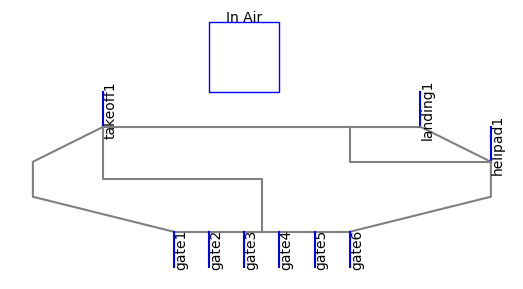

In [12]:
fig, ax = mdl.flows['ground'].show_map()

In [13]:
endresults, mdlhist = prop.nominal(mdl)

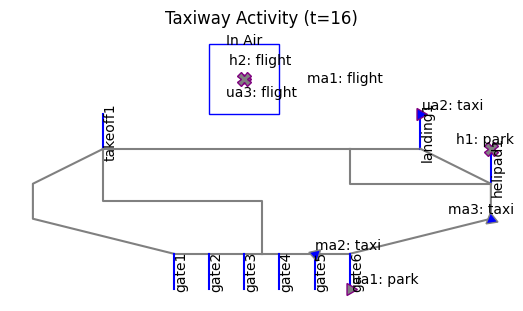

In [14]:
fig, ax=plot_tstep(mdl, mdlhist, 16, show_area_allocation=False, locattr="stage", title="Taxiway Activity ")

In [15]:
fig.savefig("modelactivity.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

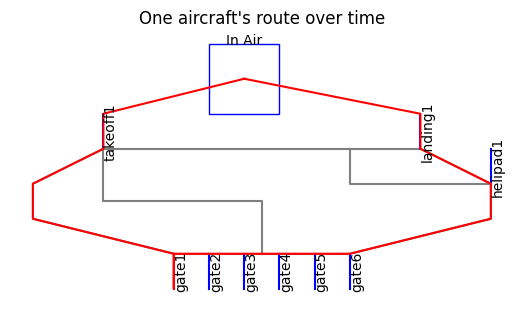

In [16]:
fig, ax = plot_course(mdl, mdlhist, "ma2", title="One aircraft's route over time")

In [17]:
fig.savefig("assetroute.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

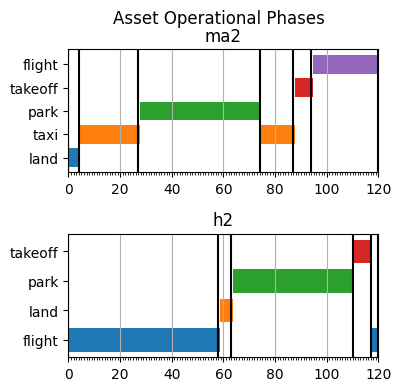

In [18]:
from fmdtools.analyze import phases
phasemaps = phases.from_hist(mdlhist)
phases_to_plot ={"ma2": phasemaps["ma2"], 'h2': phasemaps['h2']}
fig = phases.phaseplot(phases_to_plot, figsize=(4,4), title_padding=-0.02, title="Asset Operational Phases", phase_ticks="both")

In [19]:
fig.savefig("assetmodes.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

## Fault Simulation and Analysis

### Perception Fault - AC Vision Fault

In [20]:
endresults, mdlhist = prop.one_fault(mdl, "ma3", "lost_sight",
                                    desired_result={93: {"graph.flows.location":{'include_glob':False}},
                                                    110:{"graph.flows.location":{'include_glob':False}}, 
                                                    20:["graph"], 120:['graph', "endclass"]})

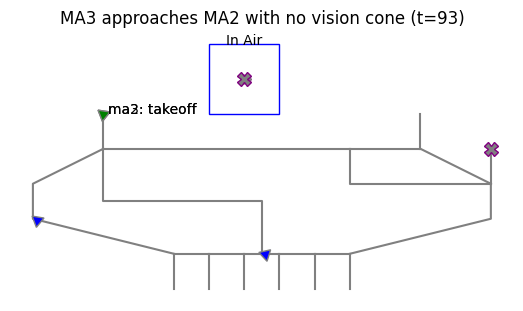

In [21]:
fig, ax = plot_tstep(mdl, mdlhist.faulty, 93,  locattr="stage", assets_to_label=["ma3", "ma2"], areas_to_label=[],
           title="MA3 approaches MA2 with no vision cone ", show_area_allocation=False)

In [22]:
fig.savefig("ac_vision_map.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [23]:
endresults.t120p0.endclass #table should also include local, global metrics

num_cycled:                            4
perc_cycled:                         0.5
num_crashed:                           2

In [24]:
endresults.t93p0.graph.flows.location
endresults.t93p0.graph.flows.location.set_edge_labels(title="")

In [25]:
#%matplotlib qt
#endresults.t93p0.graph.flows.location.move_nodes()

In [26]:
%matplotlib inline

In [27]:
pos = {'ma1': [-0.51, -0.08], 'ma1_percieved': [-0.88, 0.03], 
       'ma1_closest': [-0.3, 0.12], 'ma2': [-0.66, 0.59], 
       'ma2_percieved': [-0.81, 0.84], 'ma2_closest': [-0.67, 0.26], 
       'ma3': [0.77, 0.49], 'ma3_percieved': [0.81, 0.83], 
       'ma3_closest': [0.51, 0.28], 'ua1': [0.0, 0.62], 
       'ua1_percieved': [0.0, 0.91], 'ua1_closest': [-0.02, 0.34], 
       'ua2': [0.02, -0.64], 'ua2_percieved': [0.0, -0.88], 
       'ua2_closest': [0.04, -0.38], 'ua3': [0.66, -0.48], 
       'ua3_percieved': [0.8, -0.84], 'ua3_closest': [0.42, -0.23], 
       'h1': [0.64, 0.11], 'h1_percieved': [0.93, -0.15], 
       'h1_closest': [0.3, 0.07], 'h2': [-0.69, -0.52], 
       'h2_percieved': [-0.79, -0.85], 'h2_closest': [-0.45, -0.32]}
endresults.t93p0.graph.flows.location.set_pos(**pos)

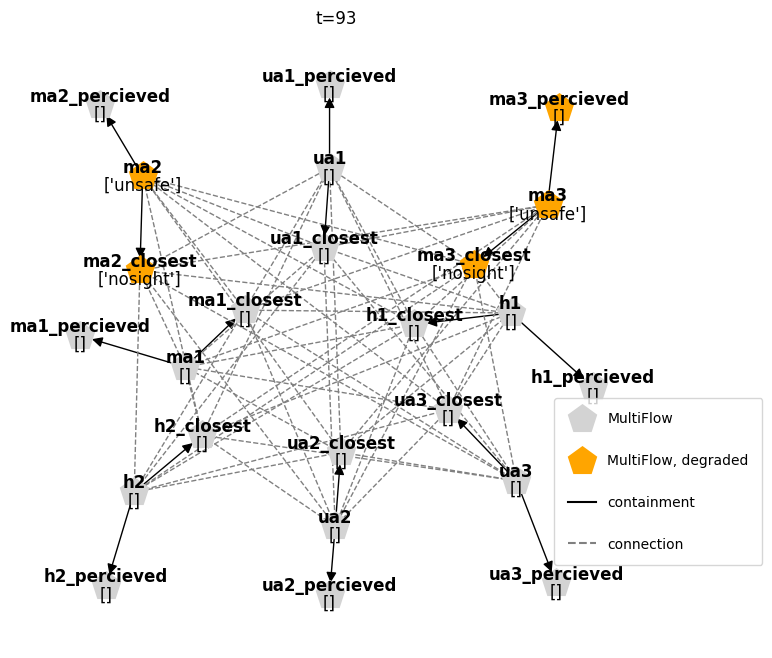

In [28]:
fig, ax = endresults.t93p0.graph.flows.location.draw(figsize=(8,8), title="t=93", legend_bbox=(0.84,0.27))

In [29]:
fig.savefig("ac_loc_93.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [30]:
#%matplotlib qt
#endresults.t120p0.graph.move_nodes()

In [31]:
%matplotlib inline

In [32]:
pos = {'atc': [-1.0, -0.15], 'ma1': [-0.86, 0.52], 'ma2': [-0.33, 0.95], 
       'ma3': [0.62, -0.78], 'ua1': [-0.66, -0.76], 'ua2': [0.36, 0.94], 
       'ua3': [-0.02, -1.0], 'h1': [0.89, 0.48], 'h2': [1.0, -0.2], 
       'ground': [0.31, -0.26], 'location': [-0.31, -0.24], 'requests': [-0.01, 0.43]}
endresults.t120p0.graph.set_pos(**pos)

In [33]:
endresults.t120p0.graph.set_edge_labels(title="")
endresults.t120p0.graph.set_node_styles(nodetype=dict(FxnBlock=dict(nx_node_size=2000),
                                                    MultiFlow=dict(nx_node_size=2000),
                                                    CommsFlow=dict(nx_node_size=2000)),
                                       degraded={}, faulty={})

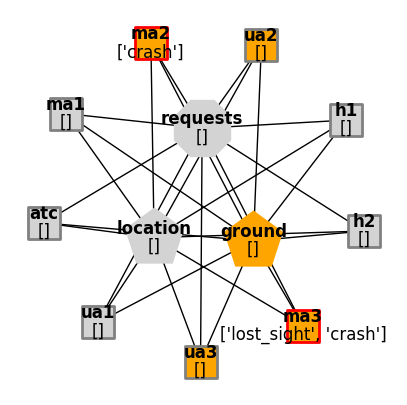

In [34]:
fig, ax = endresults.t120p0.graph.draw(figsize=(5,5), withlegend=False)

In [35]:
fig.savefig("ac_faultprop_120.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [36]:
ind_hist = create_fault_scen_metrics(mdlhist)

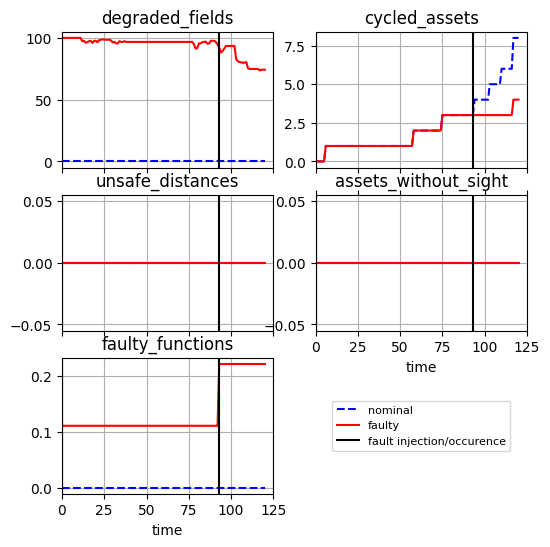

In [37]:
fig, ax = ind_hist.plot_line("degraded_fields",
                             "cycled_assets",
                             "unsafe_distances",
                             "assets_without_sight",
                             "faulty_functions",
                             time_slice=[0,93],
                             time_slice_label = "fault injection/occurence",
                             ylabels={'off-nominal fields':'%'})

In [38]:
fig.savefig("fault_history_ac_vision.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [39]:
final_values = ind_hist.faulty.get_slice(-1)
final_values

{'incorrect_fields': 0,
 'assets_without_sight': 0,
 'unsafe_distances': 0,
 'overbooked_locations': 0,
 'incorrect_perception': 0,
 'duplicate_land_commands': 0,
 'cycled_assets': 4,
 'degraded_fields': 74.2603550295858,
 'faulty_functions': 0.2222222222222222,
 'time': 120.0}

In [40]:
final_res = pd.DataFrame.from_dict({k: [v] for k, v in final_values.items()}, orient='index')
final_res

,0
incorrect_fields,0.000000
assets_without_sight,0.000000
unsafe_distances,0.000000
overbooked_locations,0.000000
incorrect_perception,0.000000
duplicate_land_commands,0.000000
cycled_assets,4.000000
degraded_fields,74.260355
faulty_functions,0.222222
time,120.000000


In [41]:
print(final_res.to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
incorrect_fields & 0.000000 \\
assets_without_sight & 0.000000 \\
unsafe_distances & 0.000000 \\
overbooked_locations & 0.000000 \\
incorrect_perception & 0.000000 \\
duplicate_land_commands & 0.000000 \\
cycled_assets & 4.000000 \\
degraded_fields & 74.260355 \\
faulty_functions & 0.222222 \\
time & 120.000000 \\
\bottomrule
\end{tabular}



### Communications Fault - Poor land command by ATC

In [42]:
from fmdtools.define.flow.multiflow import MultiFlowGraph
from fmdtools.define.flow.multiflow import CommsFlowGraph
ground_args = {'include_glob':True, "include_states":True, 
              'send_connections':{"asset_area":"asset_area", 
                                  "area_allocation":"area_allocation",
                                  "asset_assignment":"asset_assignment"}}
req_args = {'include_glob':False, "ports_only":True}

endresults, mdlhist = prop.sequence(mdl, faultseq={8:{"atc":["wrong_land_command"]},10:{"ua2":["lost_sight"]}}, 
                                         desired_result={10:{"graph.flows.requests":(CommsFlowGraph, req_args)},
                                                         11:{"graph.flows.requests":(CommsFlowGraph, req_args),
                                                            "graph.flows.ground":(MultiFlowGraph, ground_args)},
                                                         19:{"graph.flows.requests":{'include_glob':False, "ports_only":True}},
                                                         20:["graph"], 120:"endclass"})

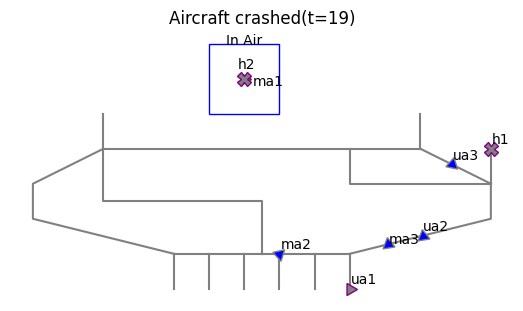

In [43]:
fig, ax = plot_tstep(mdl, mdlhist.faulty, 19, title="Aircraft crashed", areas_to_label=[])

In [44]:
fig.savefig("atc_comms_map.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [45]:
endresults.t120p0.endclass

num_cycled:                            4
perc_cycled:                         0.5
num_crashed:                           2

In [46]:
endresults.t11p0.graph.flows.ground

In [47]:
import networkx as nx

In [48]:
pos = nx.spring_layout(nx.MultiGraph(endresults.t11p0.graph.flows.ground.g))
endresults.t11p0.graph.flows.ground.set_pos(**pos)
endresults.t11p0.graph.flows.ground.set_node_labels(title="last", subtext="indicators")
endresults.t11p0.graph.flows.ground.set_edge_labels(title="")
endresults.t11p0.graph.flows.ground.set_node_styles(nodetype={'State':dict(nx_node_size=800),
                                                               'MultiFlow':dict(nx_node_size=800)},
                                                   degraded={}, faulty={})

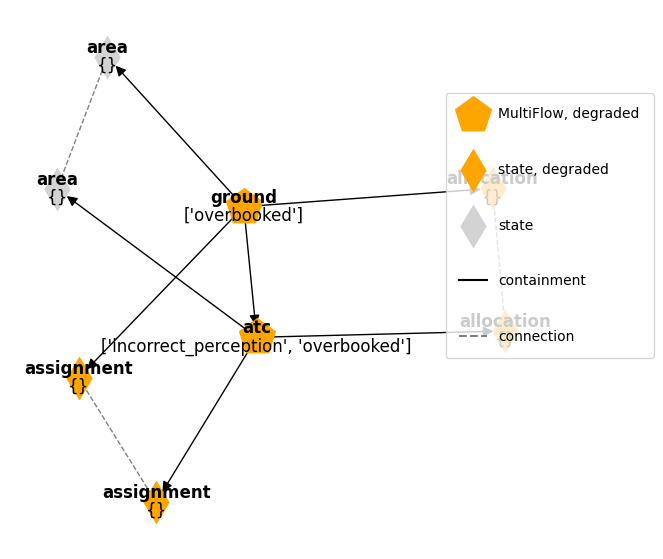

In [49]:
fig, ax = endresults.t11p0.graph.flows.ground.draw(figsize=(7,7), legend_labelspacing=3, legend_bbox=(0.79,0.6))

In [50]:
fig.savefig("atc_comms_ground_11.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [51]:
pos = nx.spring_layout(nx.MultiGraph(endresults.t10p0.graph.flows.requests.g), iterations=500)
endresults.t10p0.graph.flows.requests.set_pos(**pos)

In [52]:
endresults.t10p0.graph.flows.requests.set_edge_labels(title="")
endresults.t10p0.graph.flows.requests.set_node_styles(nodetype={'CommsFlow':dict(nx_node_size=900)},
                                                   degraded={}, faulty={})

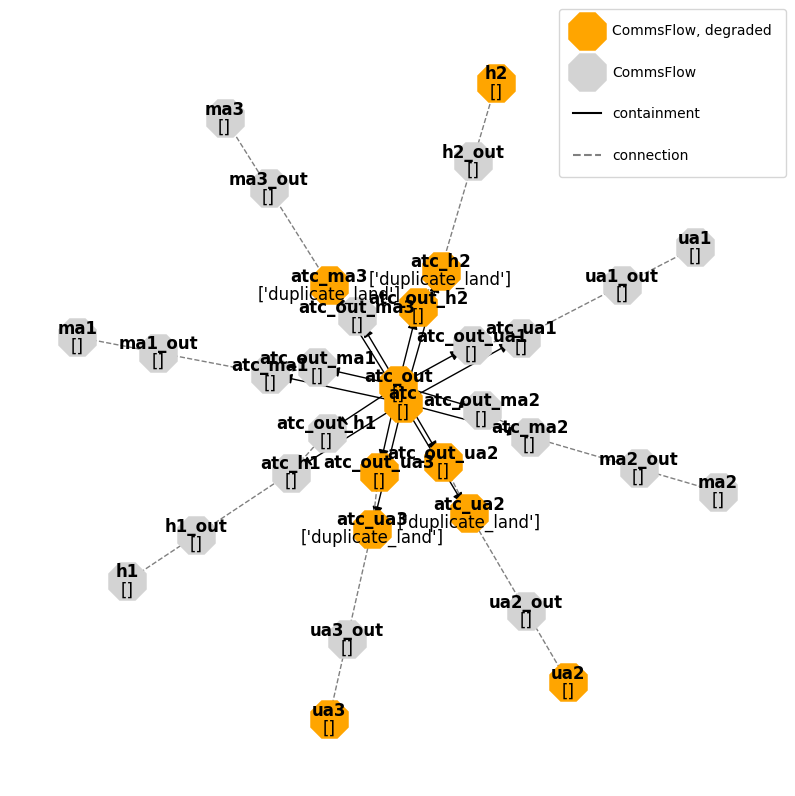

In [53]:
fig, ax = endresults.t10p0.graph.flows.requests.draw(figsize=(10,10), legend_bbox=(0.7,0.9))

In [54]:
fig.savefig("atc_comms_requests_10.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [55]:
pos = {'atc': [-1.0, -0.22], 'ma1': [-0.86, 0.52], 'ma2': [-0.33, 0.95], 
       'ma3': [0.62, -0.78], 'ua1': [-0.66, -0.76], 'ua2': [0.36, 0.94], 
       'ua3': [-0.02, -1.0], 'h1': [0.89, 0.48], 'h2': [1.0, -0.2], 
       'ground': [0.31, -0.26], 'location': [-0.31, -0.24], 'requests': [-0.01, 0.43]}
endresults.t20p0.graph.set_pos(**pos)
endresults.t20p0.graph.set_edge_labels(title="")
endresults.t20p0.graph.set_node_styles(nodetype=dict(FxnBlock=dict(nx_node_size=2000),
                                                     MultiFlow=dict(nx_node_size=2000),
                                                     CommsFlow=dict(nx_node_size=2000)),
                                       degraded={}, faulty={})

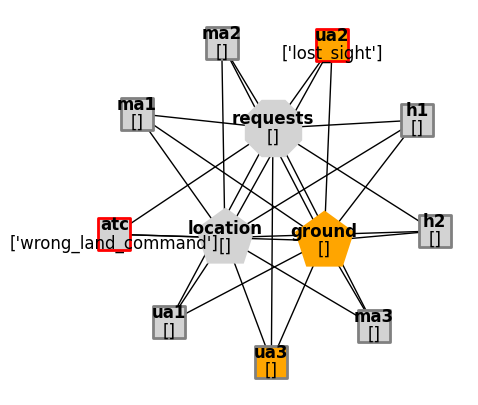

In [56]:
fig, ax = endresults.t20p0.graph.draw(withlegend=False, figsize=(5,5))

In [57]:
fig.savefig("atc_comms_resgraph.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [58]:
ind_hist = create_fault_scen_metrics(mdlhist)

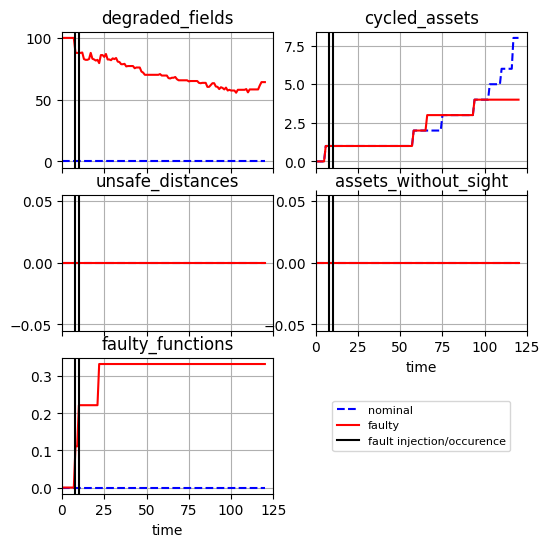

In [59]:
fig, ax = ind_hist.plot_line("degraded_fields",
                            "cycled_assets",
                            "unsafe_distances",
                            "assets_without_sight",
                            "faulty_functions",
                            time_slice=[8, 10],
                            time_slice_label = "fault injection/occurence",
                            ylabels={'off-nominal fields':'%'})

In [60]:
fig.savefig("fault_history_atc_comms.eps", format="eps", bbox_inches = 'tight', pad_inches = 0)

In [61]:
final_values = ind_hist.faulty.get_slice(-1)
final_values

{'incorrect_fields': 0,
 'assets_without_sight': 0,
 'unsafe_distances': 0,
 'overbooked_locations': 0,
 'incorrect_perception': 0,
 'duplicate_land_commands': 0,
 'cycled_assets': 4,
 'degraded_fields': 64.20118343195266,
 'faulty_functions': 0.3333333333333333,
 'time': 120.0}

In [62]:
final_res = pd.DataFrame.from_dict({k: [v] for k, v in final_values.items()}, orient='index')
final_res

,0
incorrect_fields,0.000000
assets_without_sight,0.000000
unsafe_distances,0.000000
overbooked_locations,0.000000
incorrect_perception,0.000000
duplicate_land_commands,0.000000
cycled_assets,4.000000
degraded_fields,64.201183
faulty_functions,0.333333
time,120.000000


In [63]:
print(final_res.to_latex())

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
incorrect_fields & 0.000000 \\
assets_without_sight & 0.000000 \\
unsafe_distances & 0.000000 \\
overbooked_locations & 0.000000 \\
incorrect_perception & 0.000000 \\
duplicate_land_commands & 0.000000 \\
cycled_assets & 4.000000 \\
degraded_fields & 64.201183 \\
faulty_functions & 0.333333 \\
time & 120.000000 \\
\bottomrule
\end{tabular}

